Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0090
Epoch 2/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0029
Epoch 3/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0024
Epoch 4/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0021
Epoch 5/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0021
Epoch 6/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0022
Epoch 7/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0018
Epoch 8/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0016
Epoch 9/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0016
Epoch 10/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0017
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Performance Metrics for LSTM:
Mean Absolute Error (MAE): 7.8321
Mean Squared Error (MSE): 315.2744
Root Mean Squared Error (RMSE): 17.7560


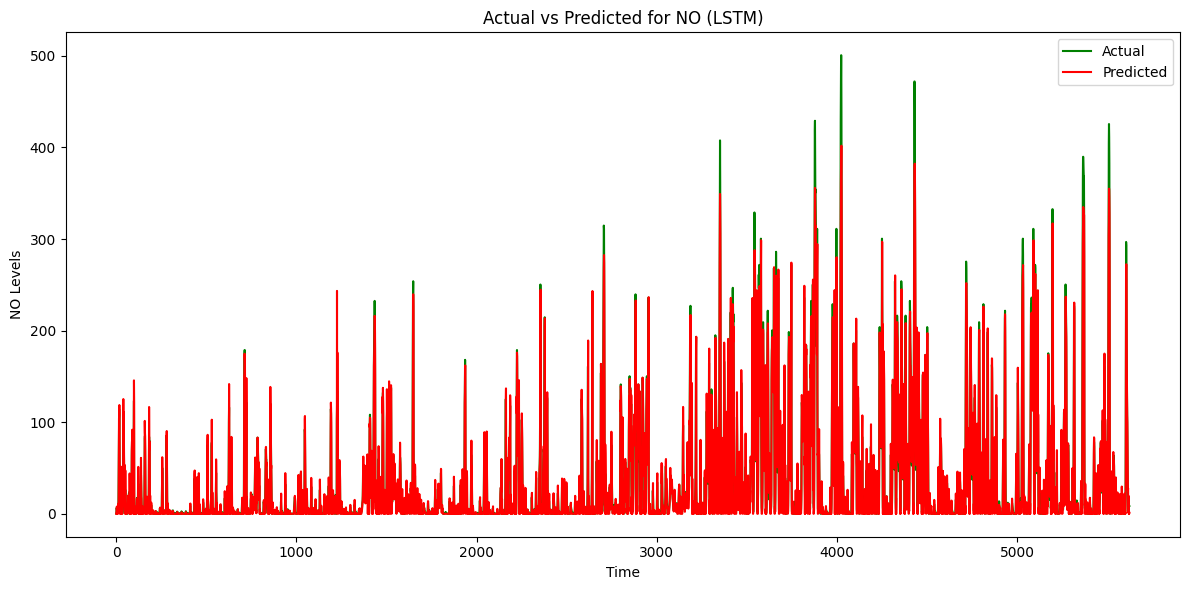

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['no']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = model.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae = mean_absolute_error(y_test_df, predictions_df)
mse = mean_squared_error(y_test_df, predictions_df)
rmse = np.sqrt(mse)

print(f"Performance Metrics for LSTM:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['no'], label='Actual', color='green')
plt.plot(predictions_df['no'], label='Predicted', color='red')
plt.title('Actual vs Predicted for NO (LSTM)')
plt.xlabel('Time')
plt.ylabel('NO Levels')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
from tensorflow.keras.utils import plot_model

# Replace 'model' with the variable name of your model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('delhi_aqi.csv')

# Display basic info
df.info()
df.head()

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Optionally visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Check and drop duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

In [ ]:
# Split the 'date' column into 'date' and 'time'
df[['date_only', 'time_only']] = df['date'].str.split(' ', expand=True)

In [ ]:
df

In [ ]:
# Convert 'date' to a datetime object to ensure proper handling
df['date'] = pd.to_datetime(df['date'])

# Create separate columns for 'date' and 'time'
df['date_only'] = df['date'].dt.date
df['time_only'] = df['date'].dt.time

# Display the first few rows to verify the changes
df.head()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numerical columns temporarily for correlation calculation
numerical_df = df.drop(columns=['date', 'date_only', 'time_only'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Excluding Date and Time Columns)')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each numerical column in the DataFrame
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Outlier Detection for {column}')
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for numerical columns
sns.pairplot(df.drop(columns=['date', 'date_only', 'time_only']))
plt.suptitle('Pairplot of Numerical Features', y=1.02)  # Title for the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for numerical columns
sns.pairplot(df.drop(columns=['date', 'date_only', 'time_only']))
plt.suptitle('Pairplot of Numerical Features', y=1.02)  # Title for the plot
plt.show()


In [ ]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter the dataset for a specific day (e.g., 2020-11-25)
specific_day = df[df['date'].dt.date == pd.to_datetime('2020-11-25').date()]

# Plot the trend of 'pm2_5' for the selected day
plt.figure(figsize=(10, 6))
plt.plot(specific_day['date'], specific_day['pm2_5'], marker='o', linestyle='-', color='b')
plt.title('Hourly Trend of PM2.5 on 2020-11-25')
plt.xlabel('Hour')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Extract month and year from the 'date' column
df['month_year'] = df['date'].dt.to_period('M')

# Filter the data for November 2020
november_data = df[df['month_year'] == '2020-11']

# Extract date-only for grouping
november_data['date_only'] = november_data['date'].dt.date

# Boxplot for pm10 across different days in November 2020
plt.figure(figsize=(10, 6))
sns.boxplot(data=november_data, x='date_only', y='pm10')
plt.xticks(rotation=90)
plt.title('Distribution of PM10 Across Days in November 2020')
plt.xlabel('Date')
plt.ylabel('PM10 Concentration')
plt.show()

In [ ]:
df.head()

In [ ]:
# Correlation heatmap (exclude 'date' and 'date_only' columns)
correlation_matrix = df.drop(columns=['date', 'date_only', 'time_only', 'month_year']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Parameters')
plt.show()


In [ ]:
# Rolling mean for 'pm2_5' (e.g., 24-hour rolling mean)
df['pm2_5_rolling'] = df['pm2_5'].rolling(window=24).mean()

# Plotting the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['pm2_5_rolling'], color='orange', label='24-hour Rolling Mean')
plt.title('24-hour Rolling Mean for PM2.5')
plt.xlabel('Hour')
plt.ylabel('PM2.5 Rolling Mean')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Filter dataset for a specific day
specific_day = df[df['date'].dt.date == pd.to_datetime('2020-11-25').date()]

# Plot the trends of multiple parameters
plt.figure(figsize=(12, 6))
plt.plot(specific_day['date'], specific_day['co'], label='CO', color='red')
plt.plot(specific_day['date'], specific_day['pm2_5'], label='PM2.5', color='blue')
plt.plot(specific_day['date'], specific_day['no2'], label='NO2', color='green')
plt.title('Hourly Trends for CO, PM2.5, and NO2 on 2020-11-25')
plt.xlabel('Hour')
plt.ylabel('Concentration')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['no']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the GRU model
lstm = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(units=50, return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = model.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae = mean_absolute_error(y_test_df, predictions_df)
mse = mean_squared_error(y_test_df, predictions_df)
rmse = np.sqrt(mse)

print(f"Performance Metrics for GRU:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot predictions vs actual values (separate plots)
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['no'], label='Actual', color='blue')
plt.plot(predictions_df['no'], label='Predicted', color='orange')
plt.title('Actual vs Predicted for NO (GRU)')
plt.xlabel('Time')
plt.ylabel('NO Levels')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions vs actual values (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(y_test_df['no'], label='Actual', color='blue')
axes[0].set_title('Actual (GRU)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('NO Levels')

axes[1].plot(predictions_df['no'], label='Predicted', color='orange')
axes[1].set_title('Predicted (GRU)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('NO Levels')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()


Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0071
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0022
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0021
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0021
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0019
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0018
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0017
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0018
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0019
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0017
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0018
Epoch 12/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0018
Epoch 13/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0017
Epoch 14/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0016
Epoch 15/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - lo

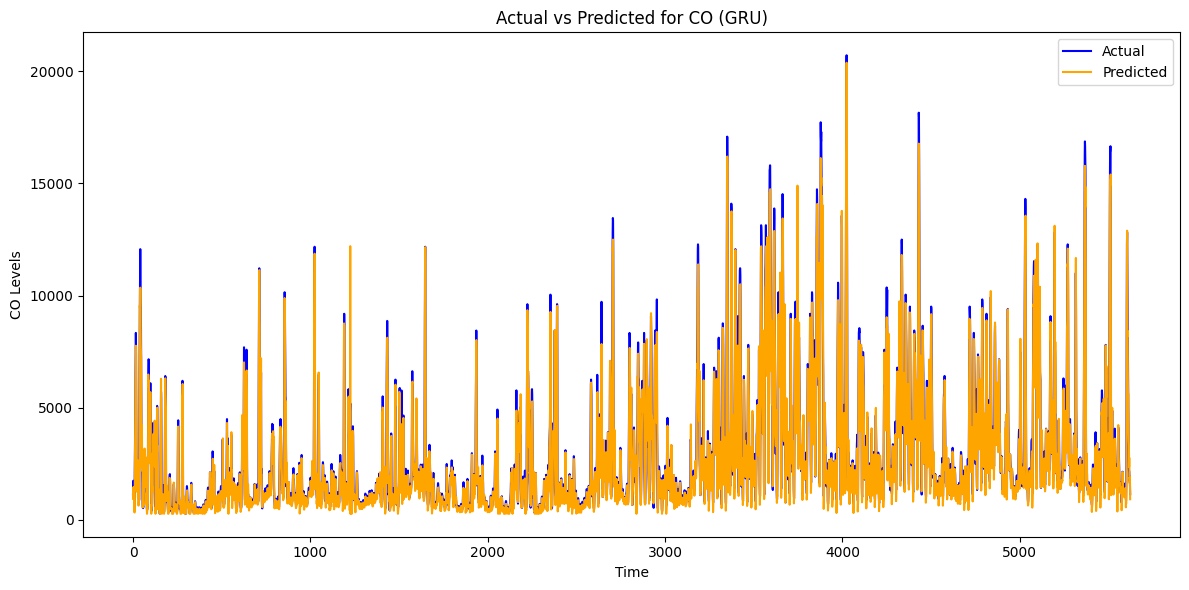

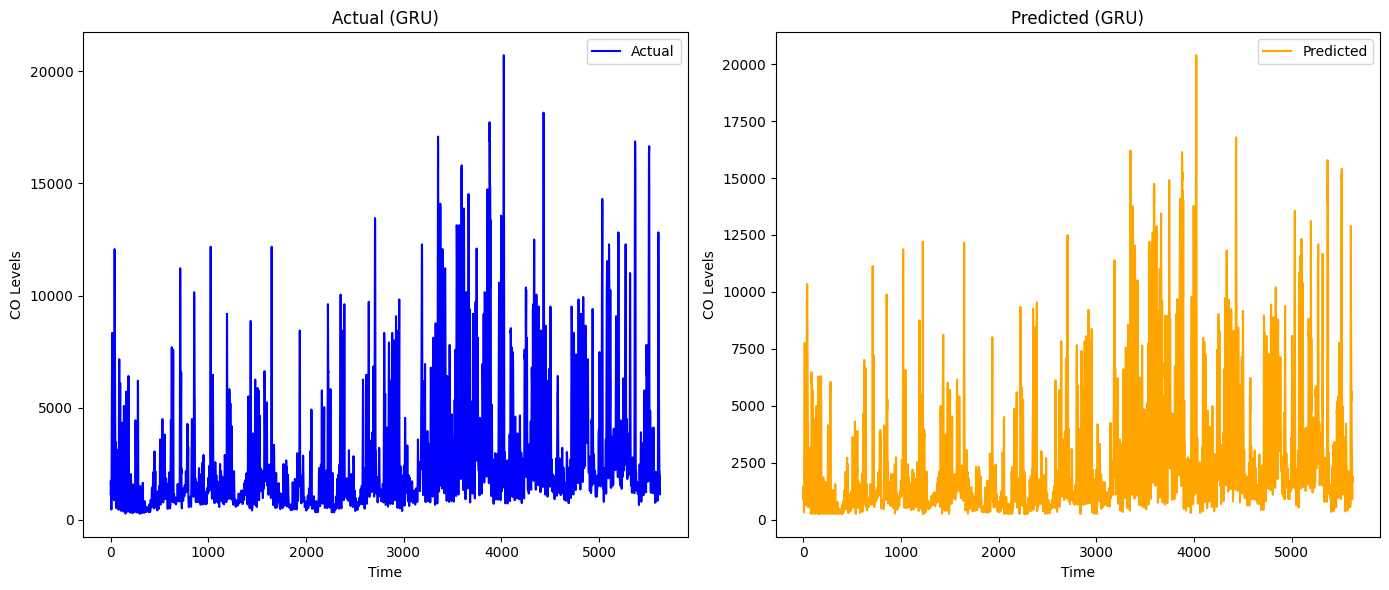

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['co']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the GRU model
gru = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(units=50, return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
gru.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = gru.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae = mean_absolute_error(y_test_df, predictions_df)
mse = mean_squared_error(y_test_df, predictions_df)
rmse = np.sqrt(mse)

print(f"Performance Metrics for GRU:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot predictions vs actual values (separate plots)
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['co'], label='Actual', color='blue')
plt.plot(predictions_df['co'], label='Predicted', color='orange')
plt.title('Actual vs Predicted for CO (GRU)')
plt.xlabel('Time')
plt.ylabel('CO Levels')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions vs actual values (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(y_test_df['co'], label='Actual', color='blue')
axes[0].set_title('Actual (GRU)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('CO Levels')

axes[1].plot(predictions_df['co'], label='Predicted', color='orange')
axes[1].set_title('Predicted (GRU)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('CO Levels')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0038
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.3566e-04
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.0788e-04
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.2843e-04
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 7.4903e-04
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.6185e-04
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.5536e-04
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.3143e-04
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.1682e-04
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.2353e-04
Epoch 12/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 6.4336e-04
Epoch 13/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 7.0914e-04
Epoch 14/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 6.8225e-04
Epoch 15/

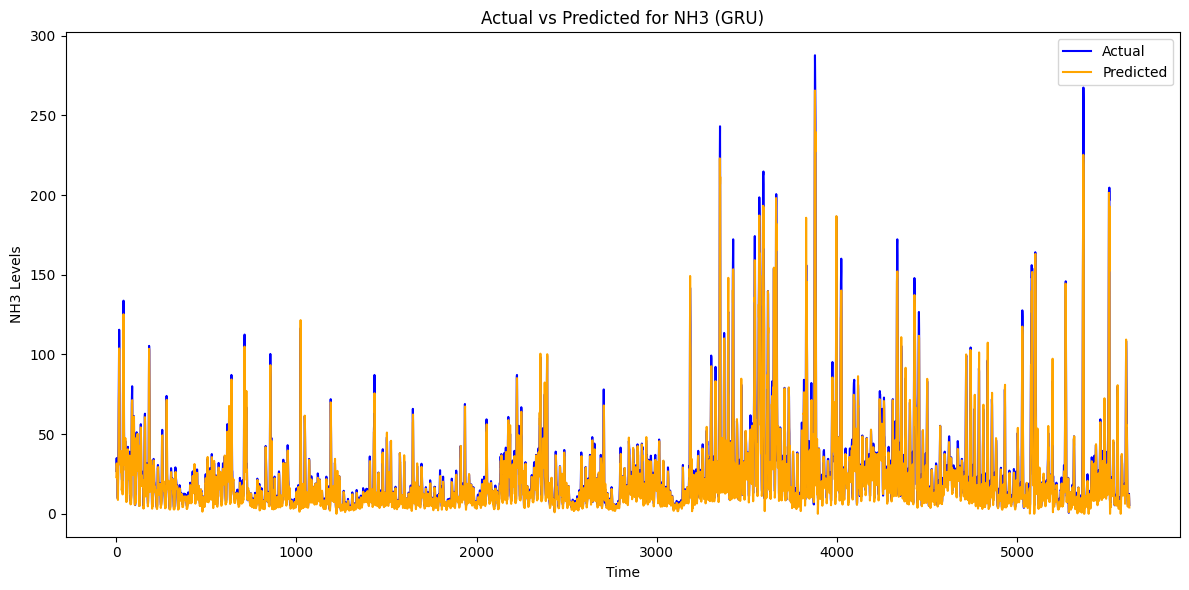

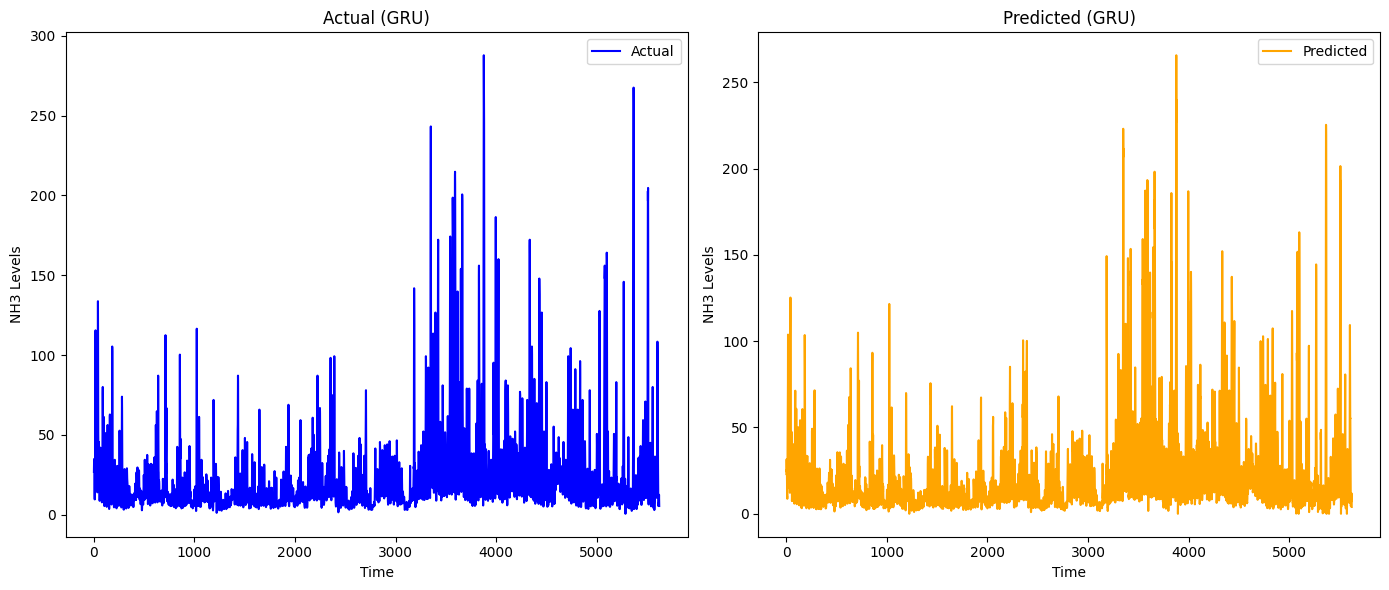

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['nh3']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the GRU model
gru = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(units=50, return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
gru.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = gru.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
nh3_mae = mean_absolute_error(y_test_df, predictions_df)
nh3_mse = mean_squared_error(y_test_df, predictions_df)
nh3_rmse = np.sqrt(mse)

print(f"Performance Metrics for GRU:")
print(f"Mean Absolute Error (MAE): {nh3_mae:.4f}")
print(f"Mean Squared Error (MSE): {nh3_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {nh3_rmse:.4f}")

# Plot predictions vs actual values (separate plots)
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['nh3'], label='Actual', color='blue')
plt.plot(predictions_df['nh3'], label='Predicted', color='orange')
plt.title('Actual vs Predicted for NH3 (GRU)')
plt.xlabel('Time')
plt.ylabel('NH3 Levels')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions vs actual values (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(y_test_df['nh3'], label='Actual', color='blue')
axes[0].set_title('Actual (GRU)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('NH3 Levels')

axes[1].plot(predictions_df['nh3'], label='Predicted', color='orange')
axes[1].set_title('Predicted (GRU)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('NH3 Levels')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0044
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0013
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0011
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0011
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0011
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0010
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0010
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9.2449e-04
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.9178e-04
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.3432e-04
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 9.7735e-04
Epoch 12/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.0409e-04
Epoch 13/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 9.2499e-04
Epoch 14/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.0830e-04
Epoch 15/50
411/411 ━━━━━━━━

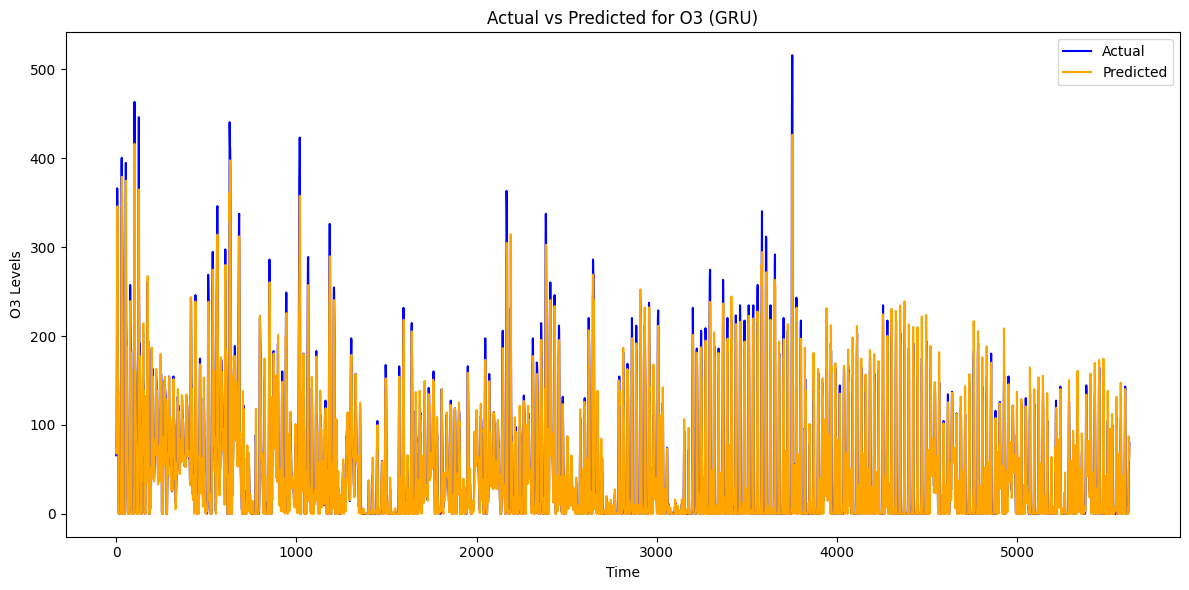

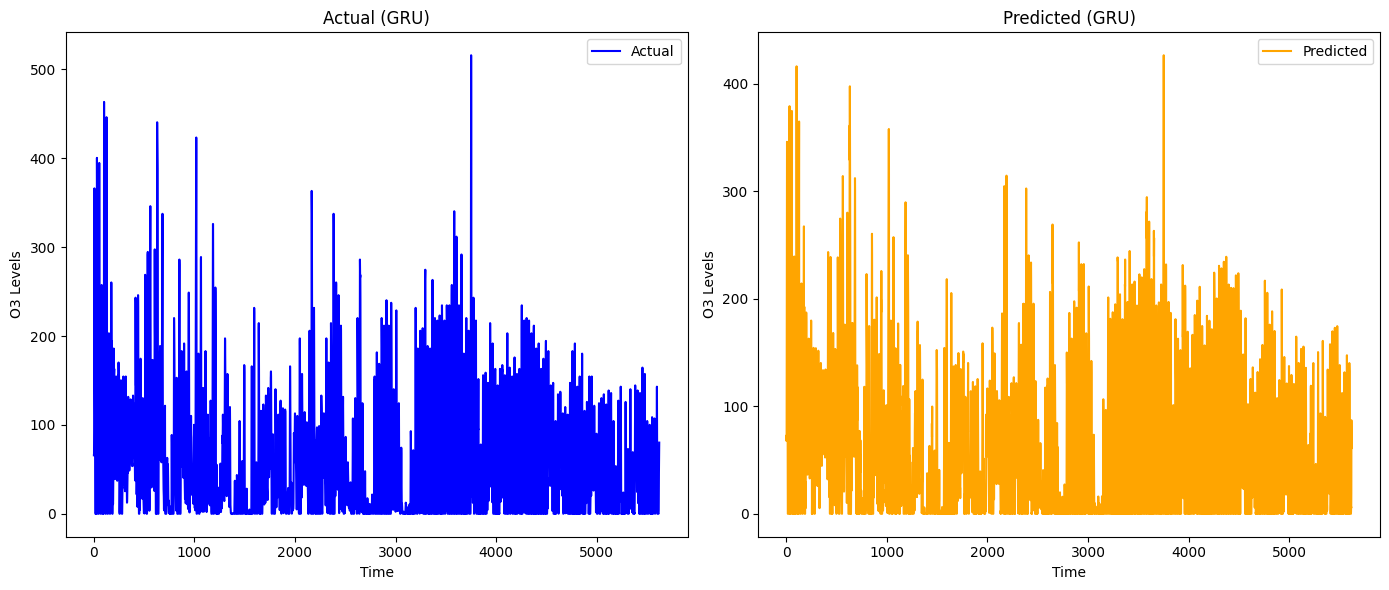

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['o3']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the GRU model
gru = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(units=50, return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
gru.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = gru.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
o3_mae = mean_absolute_error(y_test_df, predictions_df)
o3_mse = mean_squared_error(y_test_df, predictions_df)
o3_rmse = np.sqrt(mse)

print(f"Performance Metrics for GRU:")
print(f"Mean Absolute Error (MAE): {o3_mae:.4f}")
print(f"Mean Squared Error (MSE): {o3_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {o3_rmse:.4f}")

# Plot predictions vs actual values (separate plots)
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['o3'], label='Actual', color='blue')
plt.plot(predictions_df['o3'], label='Predicted', color='orange')
plt.title('Actual vs Predicted for O3 (GRU)')
plt.xlabel('Time')
plt.ylabel('O3 Levels')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions vs actual values (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(y_test_df['o3'], label='Actual', color='blue')
axes[0].set_title('Actual (GRU)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('O3 Levels')

axes[1].plot(predictions_df['o3'], label='Predicted', color='orange')
axes[1].set_title('Predicted (GRU)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('O3 Levels')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0047
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0024
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0020
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0023
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0021
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0020
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0017
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0017
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0018
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0017
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0017
Epoch 12/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0016
Epoch 13/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0016
Epoch 14/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0015
Epoch 15/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - lo

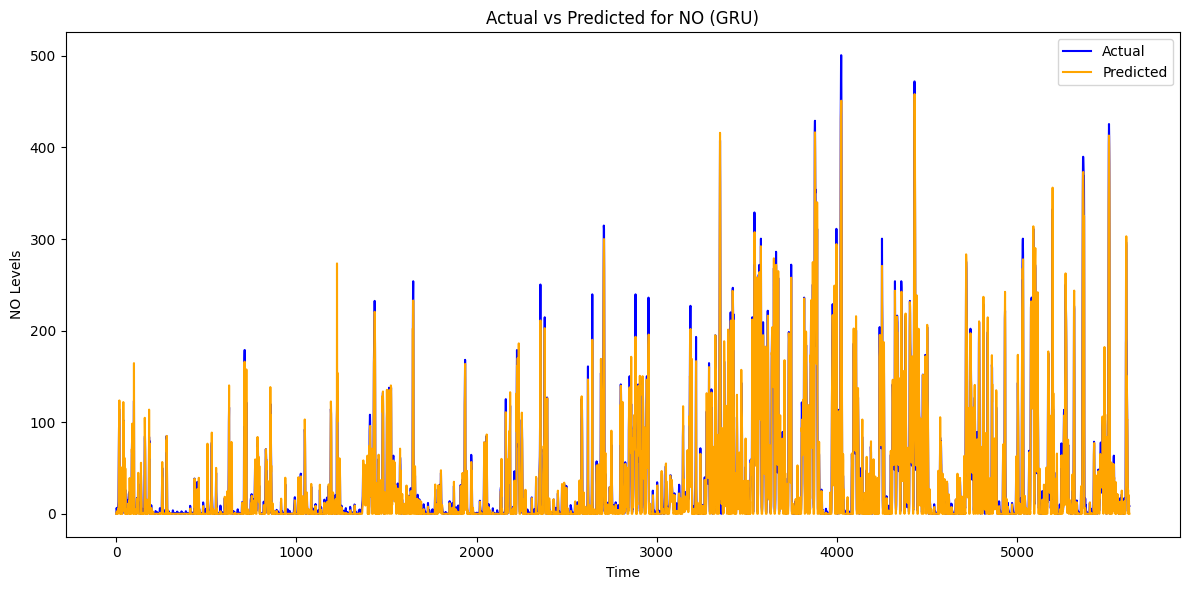

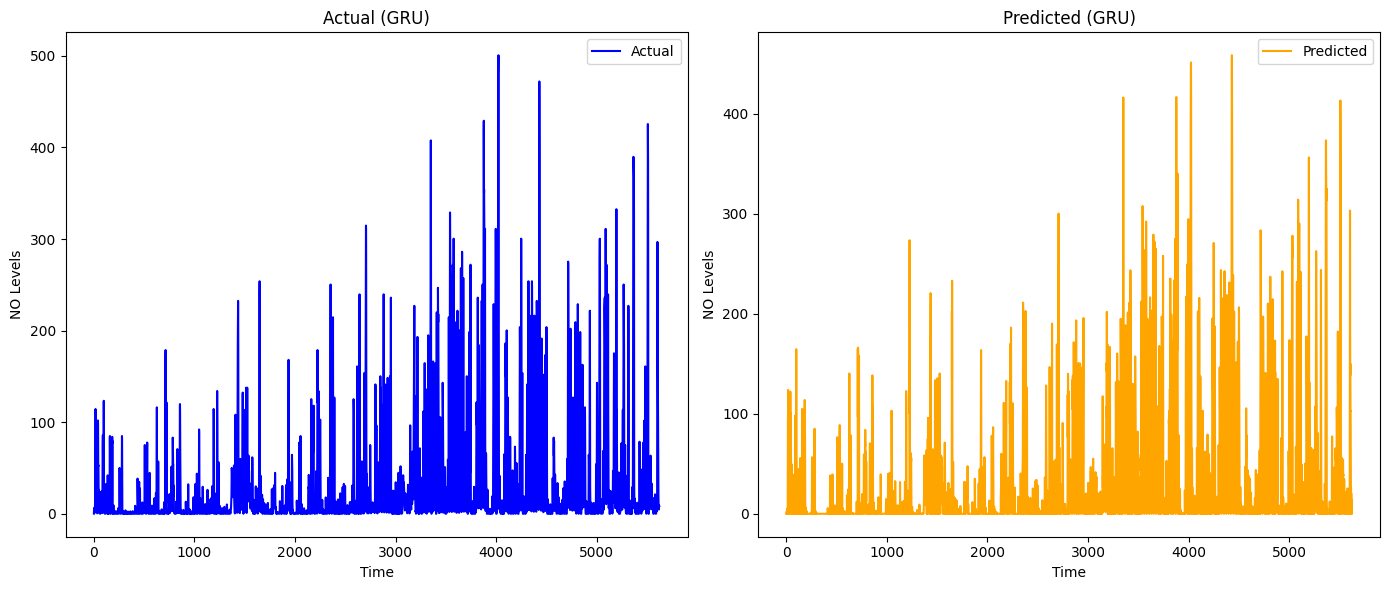

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['no']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the GRU model
gru = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(units=50, return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
gru.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = gru.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
no_mae = mean_absolute_error(y_test_df, predictions_df)
no_mse = mean_squared_error(y_test_df, predictions_df)
no_rmse = np.sqrt(mse)

print(f"Performance Metrics for GRU:")
print(f"Mean Absolute Error (MAE): {no_mae:.4f}")
print(f"Mean Squared Error (MSE): {no_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {no_rmse:.4f}")

# Plot predictions vs actual values (separate plots)
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['no'], label='Actual', color='blue')
plt.plot(predictions_df['no'], label='Predicted', color='orange')
plt.title('Actual vs Predicted for NO (GRU)')
plt.xlabel('Time')
plt.ylabel('NO Levels')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions vs actual values (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(y_test_df['no'], label='Actual', color='blue')
axes[0].set_title('Actual (GRU)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('NO Levels')

axes[1].plot(predictions_df['no'], label='Predicted', color='orange')
axes[1].set_title('Predicted (GRU)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('NO Levels')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0053
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0017
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0018
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0016
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0018
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0016
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0015
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0014
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0014
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0013
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0015
Epoch 12/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0013
Epoch 13/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0014
Epoch 14/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0014
Epoch 15/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - lo

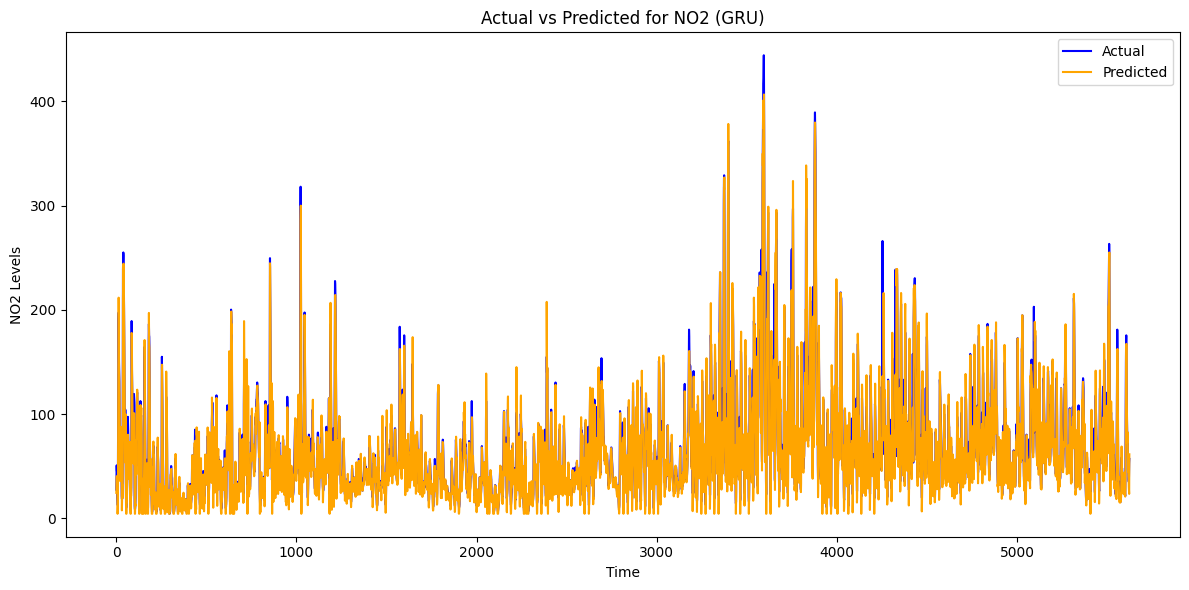

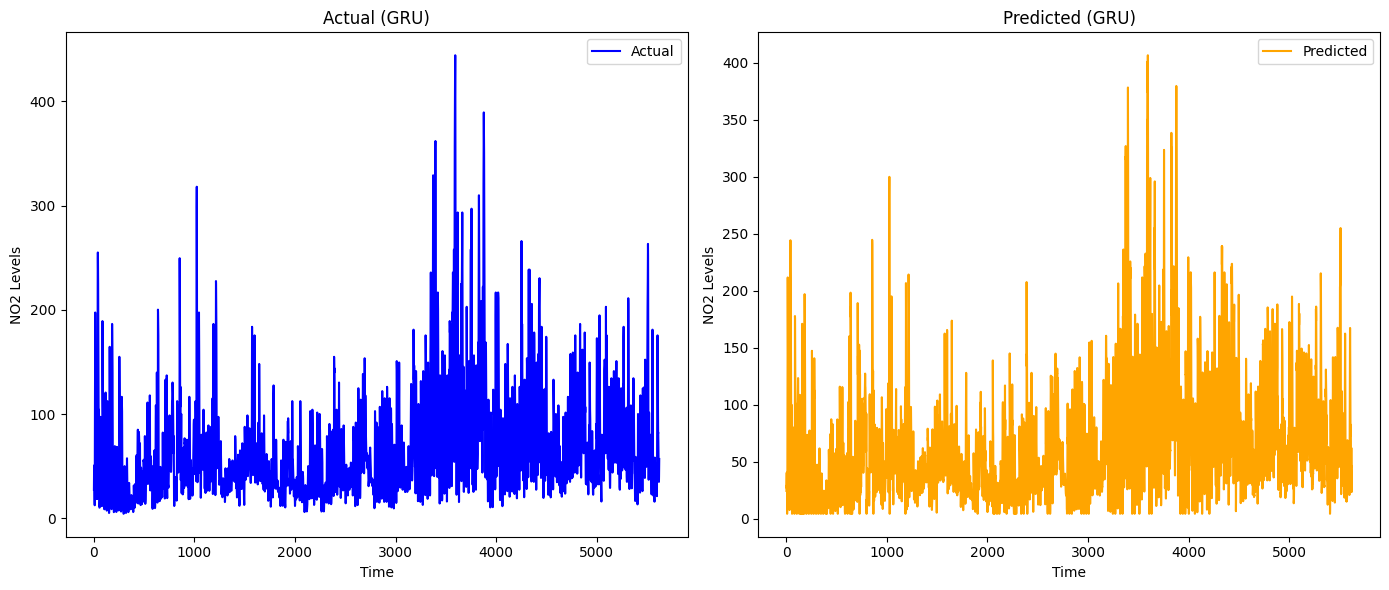

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['no2']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the GRU model
gru = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(units=50, return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
gru.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = gru.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
no2_mae = mean_absolute_error(y_test_df, predictions_df)
no2_mse = mean_squared_error(y_test_df, predictions_df)
no2_rmse = np.sqrt(mse)

print(f"Performance Metrics for GRU:")
print(f"Mean Absolute Error (MAE): {no2_mae:.4f}")
print(f"Mean Squared Error (MSE): {no2_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {no2_rmse:.4f}")

# Plot predictions vs actual values (separate plots)
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['no2'], label='Actual', color='blue')
plt.plot(predictions_df['no2'], label='Predicted', color='orange')
plt.title('Actual vs Predicted for NO2 (GRU)')
plt.xlabel('Time')
plt.ylabel('NO2 Levels')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions vs actual values (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(y_test_df['no2'], label='Actual', color='blue')
axes[0].set_title('Actual (GRU)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('NO2 Levels')

axes[1].plot(predictions_df['no2'], label='Predicted', color='orange')
axes[1].set_title('Predicted (GRU)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('NO2 Levels')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0034
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.7559e-04
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 9.5378e-04
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.5770e-04
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 9.1748e-04
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.0480e-04
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.8877e-04
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.8540e-04
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.8988e-04
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 8.8159e-04
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.9172e-04
Epoch 12/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.0551e-04
Epoch 13/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 8.3904e-04
Epoch 14/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.2310e-04
Epoch

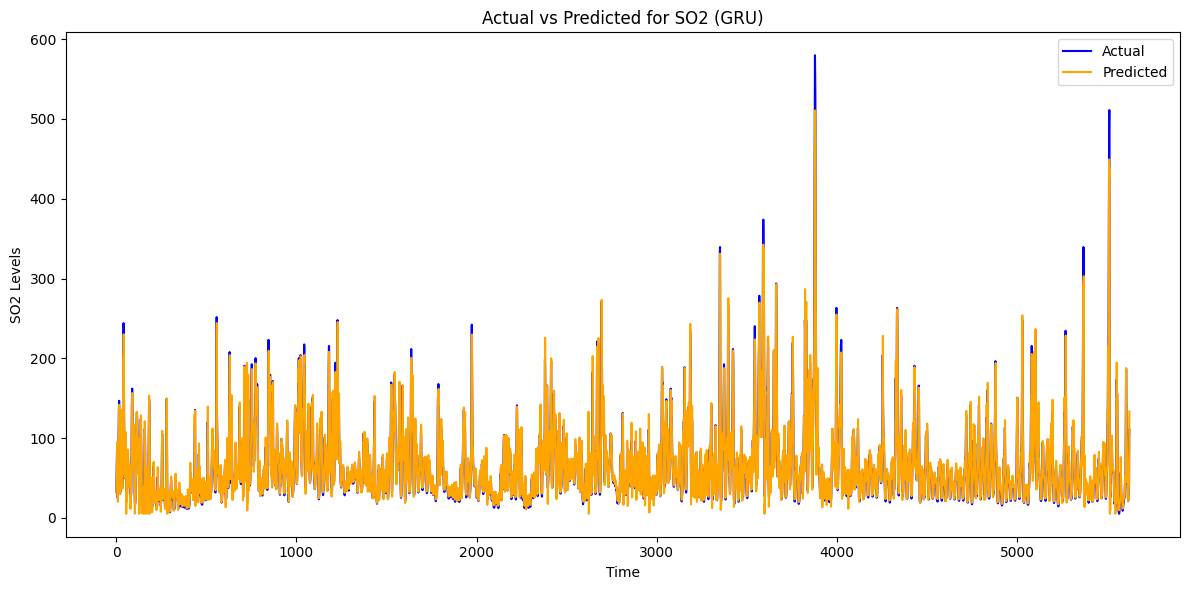

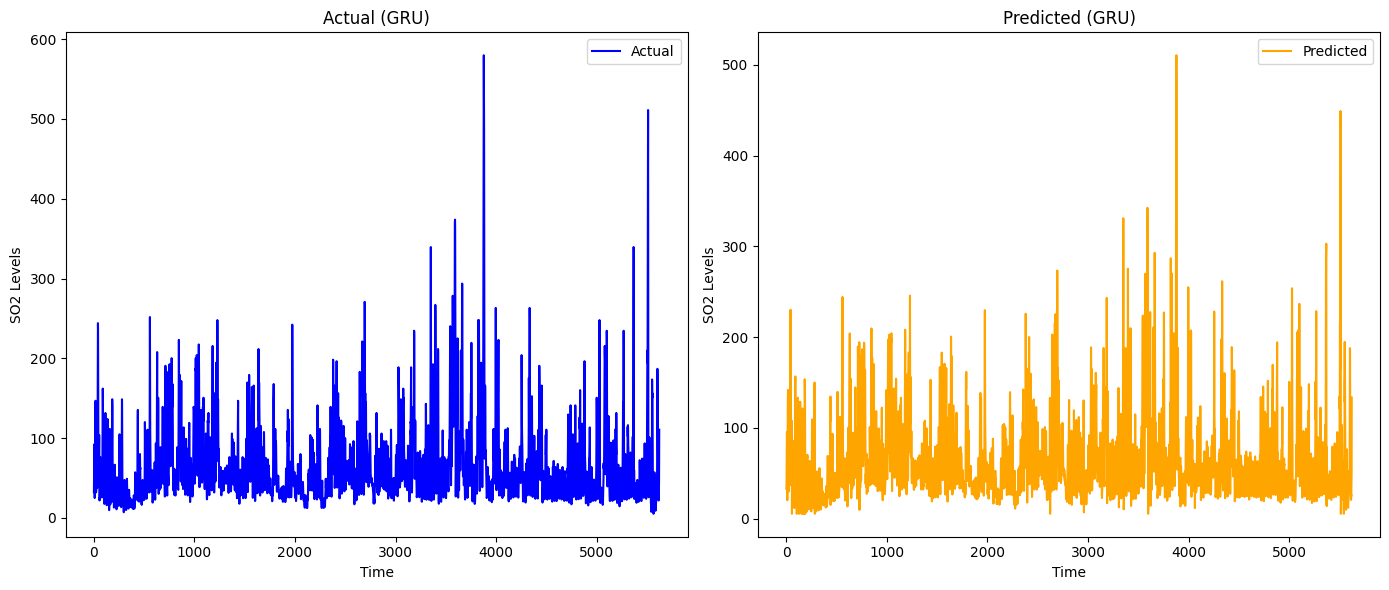

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['so2']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the GRU model
gru = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(units=50, return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
gru.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = gru.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
so2_mae = mean_absolute_error(y_test_df, predictions_df)
so2_mse = mean_squared_error(y_test_df, predictions_df)
so2_rmse = np.sqrt(mse)

print(f"Performance Metrics for GRU:")
print(f"Mean Absolute Error (MAE): {so2_mae:.4f}")
print(f"Mean Squared Error (MSE): {so2_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {so2_rmse:.4f}")

# Plot predictions vs actual values (separate plots)
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['so2'], label='Actual', color='blue')
plt.plot(predictions_df['so2'], label='Predicted', color='orange')
plt.title('Actual vs Predicted for SO2 (GRU)')
plt.xlabel('Time')
plt.ylabel('SO2 Levels')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions vs actual values (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(y_test_df['so2'], label='Actual', color='blue')
axes[0].set_title('Actual (GRU)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('SO2 Levels')

axes[1].plot(predictions_df['so2'], label='Predicted', color='orange')
axes[1].set_title('Predicted (GRU)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('SO2 Levels')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0058
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0021
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0016
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0017
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0017
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0015
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0015
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0014
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0015
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0015
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0015
Epoch 12/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0014
Epoch 13/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0013
Epoch 14/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0013
Epoch 15/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - lo

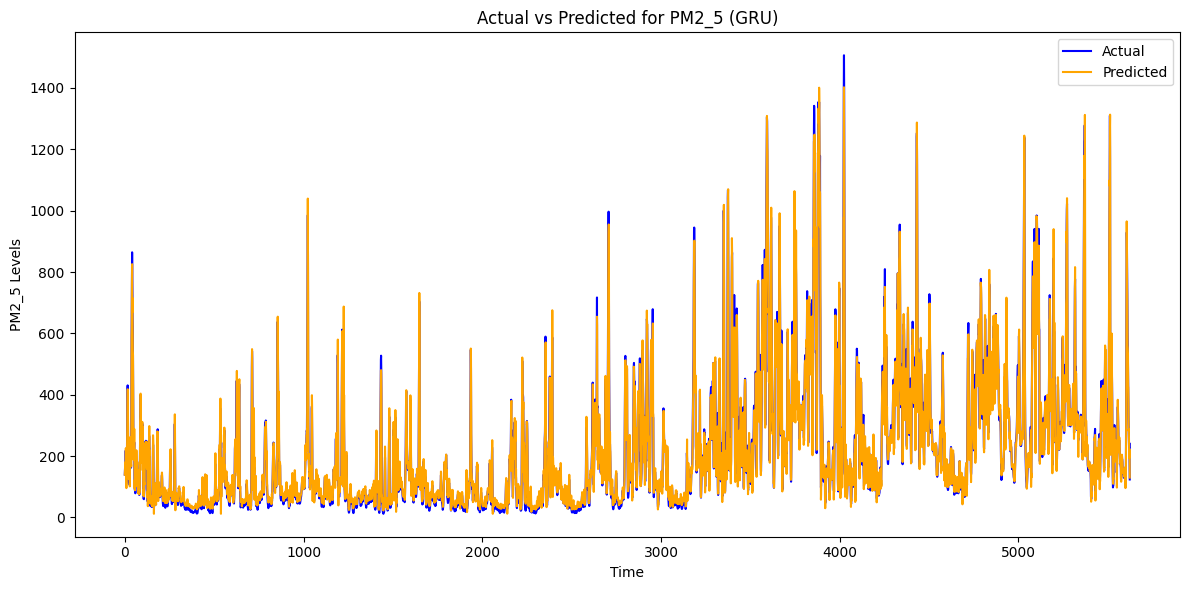

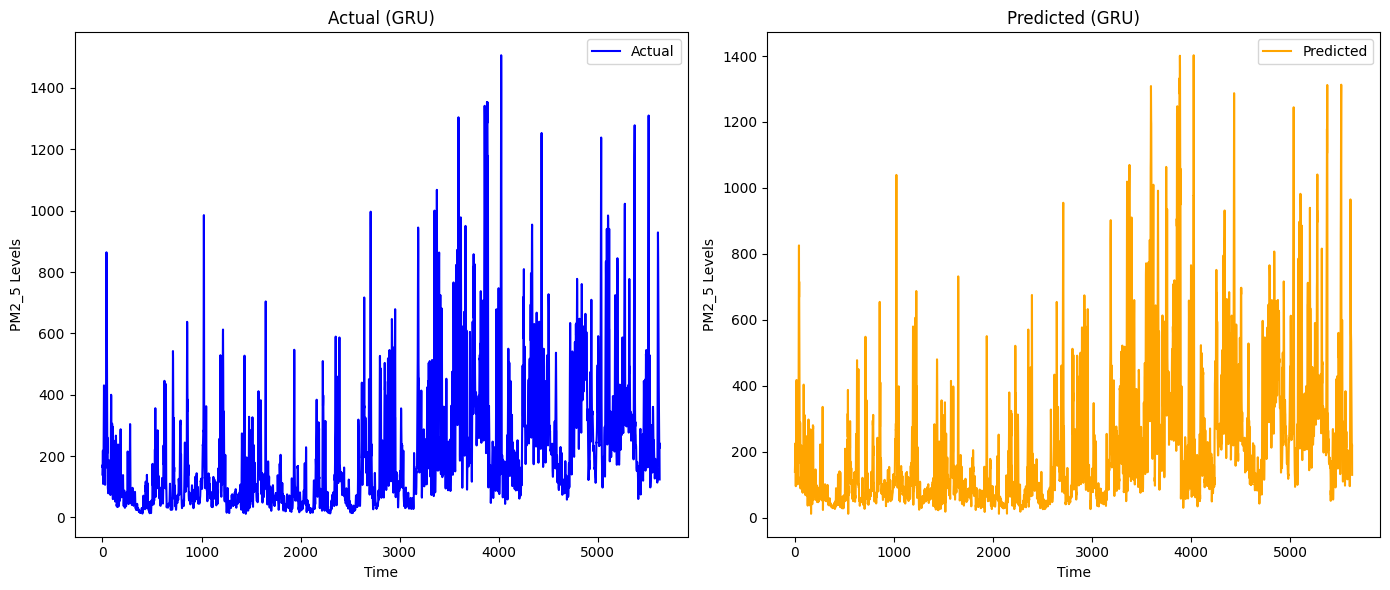

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['pm2_5']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the GRU model
gru = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(units=50, return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
gru.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = gru.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
pm2_mae = mean_absolute_error(y_test_df, predictions_df)
pm2_mse = mean_squared_error(y_test_df, predictions_df)
pm2_rmse = np.sqrt(mse)

print(f"Performance Metrics for GRU:")
print(f"Mean Absolute Error (MAE): {pm2_mae:.4f}")
print(f"Mean Squared Error (MSE): {pm2_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {pm2_rmse:.4f}")

# Plot predictions vs actual values (separate plots)
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['pm2_5'], label='Actual', color='blue')
plt.plot(predictions_df['pm2_5'], label='Predicted', color='orange')
plt.title('Actual vs Predicted for PM2_5 (GRU)')
plt.xlabel('Time')
plt.ylabel('PM2_5 Levels')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions vs actual values (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(y_test_df['pm2_5'], label='Actual', color='blue')
axes[0].set_title('Actual (GRU)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('PM2_5 Levels')

axes[1].plot(predictions_df['pm2_5'], label='Predicted', color='orange')
axes[1].set_title('Predicted (GRU)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('PM2_5 Levels')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0064
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0020
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0019
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0017
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0016
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0017
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0016
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0016
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0014
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0015
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0015
Epoch 12/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0015
Epoch 13/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0015
Epoch 14/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0014
Epoch 15/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - lo

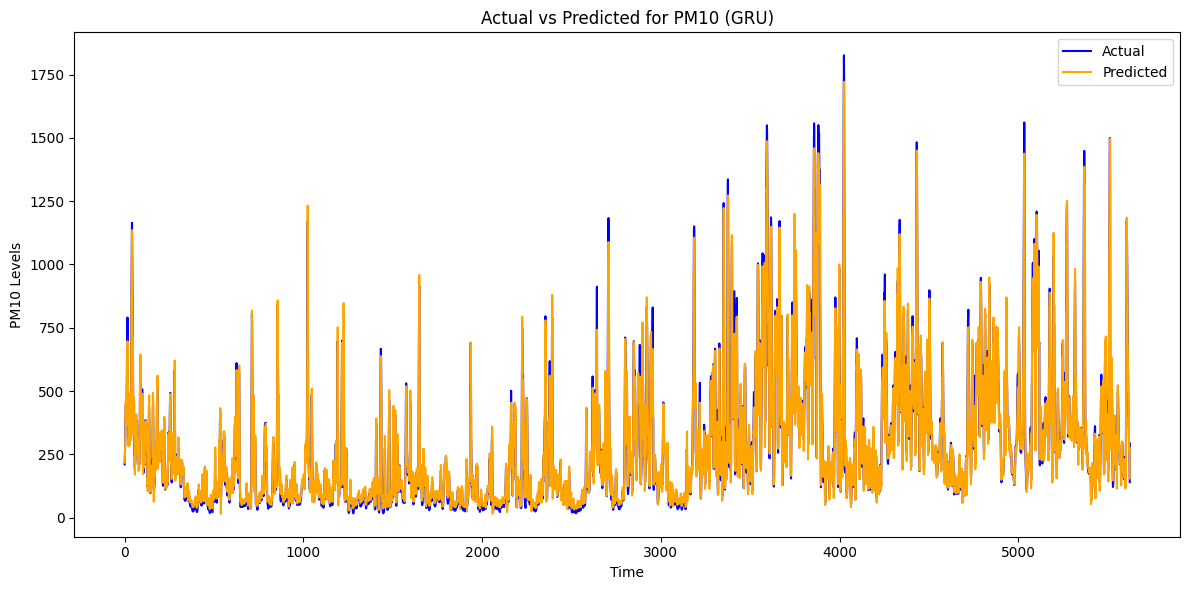

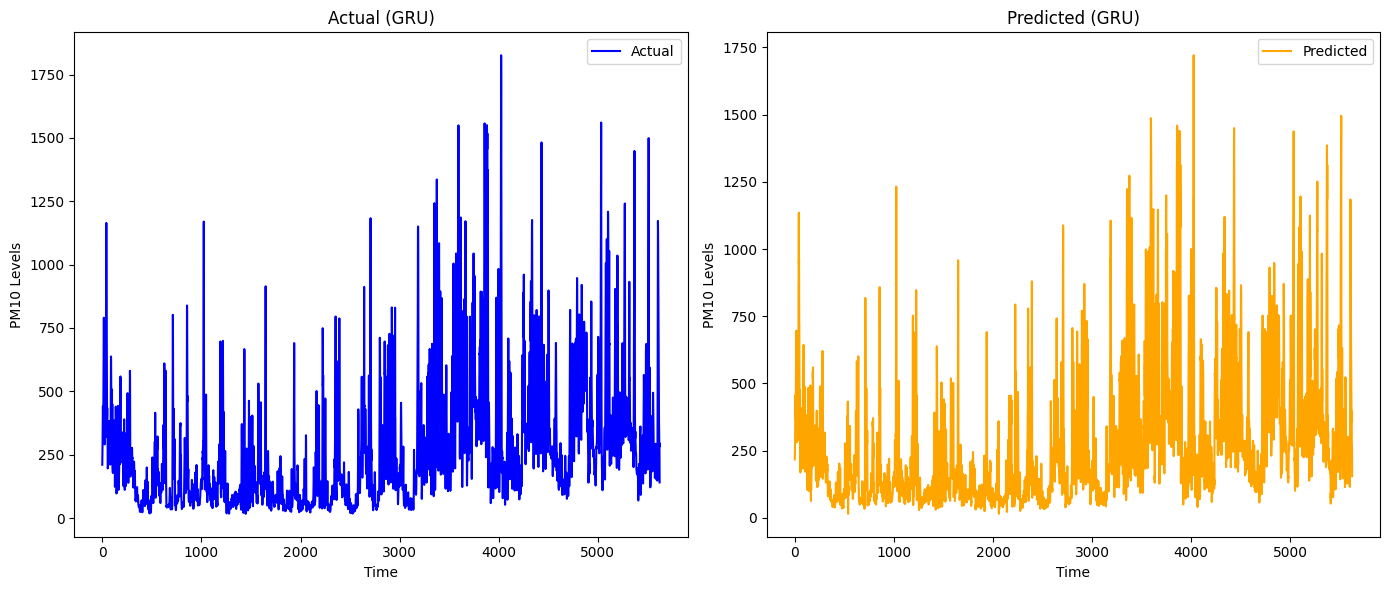

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['pm10']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the GRU model
gru = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(units=50, return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
gru.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = gru.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
pm1_mae = mean_absolute_error(y_test_df, predictions_df)
pm1_mse = mean_squared_error(y_test_df, predictions_df)
pm1_rmse = np.sqrt(mse)

print(f"Performance Metrics for GRU:")
print(f"Mean Absolute Error (MAE): {pm1_mae:.4f}")
print(f"Mean Squared Error (MSE): {pm1_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {pm1_rmse:.4f}")

# Plot predictions vs actual values (separate plots)
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['pm10'], label='Actual', color='blue')
plt.plot(predictions_df['pm10'], label='Predicted', color='orange')
plt.title('Actual vs Predicted for PM10 (GRU)')
plt.xlabel('Time')
plt.ylabel('PM10 Levels')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions vs actual values (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(y_test_df['pm10'], label='Actual', color='blue')
axes[0].set_title('Actual (GRU)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('PM10 Levels')

axes[1].plot(predictions_df['pm10'], label='Predicted', color='orange')
axes[1].set_title('Predicted (GRU)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('PM10 Levels')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Feature selection
features = ['no']  # Select the target parameter (e.g., 'no')
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Data preparation for LSTM model
sequence_length = 30  # Use last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Train-test split (70% for training, 30% for testing)
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predictions
X_predict = X[train_size:]
y_predict = y[train_size:]
predictions = model.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae = mean_absolute_error(y_test_df, predictions_df)
mse = mean_squared_error(y_test_df, predictions_df)
rmse = np.sqrt(mse)

print(f"Performance Metrics for LSTM:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['no'], label='Actual', color='blue')
plt.plot(predictions_df['no'], label='Predicted', color='orange')
plt.title('Actual vs Predicted for NO (LSTM)')
plt.xlabel('Time')
plt.ylabel('NO Levels')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path
features = ['no']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X[:int(0.7 * len(X))], dtype=tf.float32)
y_train = tf.convert_to_tensor(y[:int(0.7 * len(y))], dtype=tf.float32)
X_test = tf.convert_to_tensor(X[int(0.7 * len(X)):], dtype=tf.float32)
y_test = tf.convert_to_tensor(y[int(0.7 * len(y)):], dtype=tf.float32)

# Build BiLSTM model
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions_bilstm = model_bilstm.predict(X_test)

# Convert predictions and actual values back to the original scale
predictions_bilstm = scaler.inverse_transform(predictions_bilstm)
y_test_original = scaler.inverse_transform(y_test)

# Performance Metrics
mae_bilstm = mean_absolute_error(y_test_original, predictions_bilstm)
mse_bilstm = mean_squared_error(y_test_original, predictions_bilstm)
rmse_bilstm = np.sqrt(mse_bilstm)

print(f"BiLSTM Performance Metrics:")
print(f"MAE: {mae_bilstm:.4f}")
print(f"MSE: {mse_bilstm:.4f}")
print(f"RMSE: {rmse_bilstm:.4f}")

# Plot predictions vs actual values
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predictions_bilstm, label='Predicted', color='orange')
plt.title('BiLSTM - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('NO Levels')
plt.legend()
plt.show()


In [ ]:
# Define the LSTM model
lstm_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Print the LSTM model architecture
lstm_model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the architecture of the LSTM model
plot_model(lstm, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the architecture of the LSTM model
plot_model(model_bilstm, to_file='model_bilstm.png', show_shapes=True, show_layer_names=True)

In [ ]:
df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from ncps.wirings import AutoNCP
from ncps.tf import LTCCell

# Load dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with the actual file name

# Convert 'date' column to datetime and extract useful features
df['Datetime'] = pd.to_datetime(df['date'])
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month

# Drop unnecessary columns
df.drop(['date', 'Datetime'], axis=1, inplace=True)

# Define features and target
features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'Hour', 'DayOfWeek', 'Day', 'Month']
target = 'pm2_5'

X = df[features].values
y = df[target].values

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LNN input
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LNN model
wiring = AutoNCP(32, output_size=1)  # 32 hidden units, output size 1
ltc_cell = LTCCell(wiring)

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1, X_train.shape[2])),  # Input shape (time steps, features)
    tf.keras.layers.RNN(ltc_cell, return_sequences=False),  # LTC layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.4f}')


In [ ]:
!pip install ncps

In [ ]:
from ncps.wirings import AutoNCP
from ncps.tf import LTCCell


In [ ]:
!pip install --upgrade tensorflow


In [ ]:
!pip install --upgrade ncps

In [ ]:
from ncps.wirings import AutoNCP
from ncps.tf import LTCCell

In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
!pip install --upgrade ncps


In [ ]:
import tensorflow as tf
from ncps.wirings import AutoNCP
from ncps.tf import LTCCell


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from ncps.wirings import AutoNCP
from ncps.tf import LTCCell

# Load dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with the actual file name

# Convert 'date' column to datetime and extract useful features
df['Datetime'] = pd.to_datetime(df['date'])
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month

# Drop unnecessary columns
df.drop(['date', 'Datetime'], axis=1, inplace=True)

# Define features and target
features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'Hour', 'DayOfWeek', 'Day', 'Month']
target = 'pm2_5'

X = df[features].values
y = df[target].values

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into 70% and 30%
split_index = int(0.7 * len(X))
X_train_test, X_predict = X[:split_index], X[split_index:]
y_train_test, y_predict = y[:split_index], y[split_index:]

# Further split the 70% data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.2, random_state=42)

# Reshape data for LNN input
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_predict = X_predict.reshape((X_predict.shape[0], 1, X_predict.shape[1]))

# Build the LNN model
wiring = AutoNCP(32, output_size=1)  # 32 hidden units, output size 1
ltc_cell = LTCCell(wiring)

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1, X_train.shape[2])),  # Input shape (time steps, features)
    tf.keras.layers.RNN(ltc_cell, return_sequences=False),  # LTC layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate on test set (part of the 70%)
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE (70% data): {test_mae:.4f}')

# Predict and evaluate on the remaining 30%
y_pred = model.predict(X_predict)
mae_30 = np.mean(np.abs(y_predict - y_pred))
print(f'MAE on 30% prediction data: {mae_30:.4f}')


In [ ]:
# Predict on the remaining 30% data
y_pred = model.predict(X_predict)

# Calculate the absolute error for each prediction
errors = np.abs(y_predict - y_pred.flatten())

# Display the predictions, actual values, and errors in a DataFrame
results_df = pd.DataFrame({
    'Actual Value': y_predict,
    'Predicted Value': y_pred.flatten(),
    'Absolute Error': errors
})

# Display the results
print(results_df)

# Optionally, save the predictions to a CSV file
results_df.to_csv('predictions_results.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt

# Predict on the remaining 30% data
y_pred = model.predict(X_predict)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_predict, label="Actual Values", color='blue', marker='o')
plt.plot(y_pred.flatten(), label="Predicted Values", color='red', linestyle='--', marker='x')

# Add labels, title, and legend
plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("PM2.5 Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [ ]:
from tensorflow.keras.utils import plot_model

# Save the model architecture diagram to a file
plot_model(
    model,
    to_file='lnn_model_architecture.png',
    show_shapes=True,  # Display the shape of each layer
    show_layer_names=True,  # Display the name of each layer
    dpi=100  # Set resolution for the image
)

# Display the diagram in Jupyter Notebook or Colab
from IPython.display import Image
Image(filename='lnn_model_architecture.png')


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from ncps.wirings import AutoNCP
from ncps.tf import LTCCell

# Load dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with the actual file name

# Convert 'date' column to datetime and extract useful features
df['Datetime'] = pd.to_datetime(df['date'])
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month

# Drop unnecessary columns
df.drop(['date', 'Datetime'], axis=1, inplace=True)

# Define features and target
features = ['co', 'no', 'no2', 'o3', 'pm2_5', 'pm10', 'nh3']
target = features

X = df[features].values
y = df[target].values

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into 70% and 30%
split_index = int(0.7 * len(X))
X_train_test, X_predict = X[:split_index], X[split_index:]
y_train_test, y_predict = y[:split_index], y[split_index:]

# Further split the 70% data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.2, random_state=42)

# Reshape data for LNN input
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_predict = X_predict.reshape((X_predict.shape[0], 1, X_predict.shape[1]))

# Build the LNN model with additional layers
wiring = AutoNCP(32, output_size=1)  # 32 hidden units, output size 1
ltc_cell = LTCCell(wiring)

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1, X_train.shape[2])),  # Input shape (time steps, features)
    tf.keras.layers.RNN(ltc_cell, return_sequences=False),  # LTC layer
    tf.keras.layers.Dense(32, activation='relu'),  # Additional dense layer
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization
    tf.keras.layers.Dense(16, activation='relu'),  # Another dense layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Visualize model architecture
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate on test set (part of the 70%)
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE (70% data): {test_mae:.4f}')

# Predict and evaluate on the remaining 30%
y_pred = model.predict(X_predict)
mae_30 = np.mean(np.abs(y_predict - y_pred))
print(f'MAE on 30% prediction data: {mae_30:.4f}')

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Model Training Performance')
plt.show()


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('delhi_aqi.csv')

In [ ]:
df.head()

In [ ]:
# Drop 'date' and 'so2' columns
df.drop(columns=['date', 'so2'], inplace=True)

# Define AQI calculation function based on available pollutants
def calculate_aqi(row):
    # Using PM2.5, PM10, O3, CO, NO, NH3 (approximate method)
    aqi = max(row['pm2_5'], row['pm10'], row['o3'], row['co'], row['no'], row['nh3'])
    return aqi

# Apply AQI calculation
df['calculated_aqi'] = df.apply(calculate_aqi, axis=1)

# Save the updated file


# Display the first few rows of the updated dataset
df.head()


In [ ]:
# Convert CO from µg/m³ to mg/m³
df['co'] = df['co'] / 1000

In [ ]:
def calculate_aqi(row):
    # Using PM2.5, PM10, O3, CO, NO, NH3 (approximate method)
    aqi = max(row['pm2_5'], row['pm10'], row['o3'], row['co'], row['no'], row['nh3'])
    return aqi

# Apply AQI calculation
df['calculated_aqi'] = df.apply(calculate_aqi, axis=1)

In [ ]:
df.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "delhi_aqi.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Set up the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(df)), y=df["calculated_aqi"], marker="o", color="red")

# Labels and title
plt.xlabel("Time Index")
plt.ylabel("AQI Value")
plt.title("Air Quality Index (AQI) Over Time")
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = "delhi_aqi.csv"  # Update this with your actual file path
df = pd.read_csv(file_path)

# Drop 'date' and 'so2' columns if they exist
df.drop(columns=['date', 'so2'], errors='ignore', inplace=True)

# Define AQI breakpoints for each pollutant based on CPCB standards
breakpoints = {
    "pm2_5": [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400), (251, 500, 401, 500)],
    "pm10": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200), (251, 350, 201, 300), (351, 430, 301, 400), (431, 600, 401, 500)],
    "o3": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300), (209, 748, 301, 400), (749, 1000, 401, 500)],
    "co": [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200), (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 50, 401, 500)],
    "no2": [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), (181, 280, 201, 300), (281, 400, 301, 400), (401, 500, 401, 500)],
    "nh3": [(0, 200, 0, 50), (201, 400, 51, 100), (401, 800, 101, 200), (801, 1200, 201, 300), (1201, 1800, 301, 400), (1801, 2500, 401, 500)]
}

# Function to calculate AQI for a given pollutant
def get_aqi(value, pollutant):
    for bp_low, bp_high, i_low, i_high in breakpoints[pollutant]:
        if bp_low <= value <= bp_high:
            return ((i_high - i_low) / (bp_high - bp_low)) * (value - bp_low) + i_low
    return 500  # If value exceeds max range, cap at 500

# Compute AQI for each pollutant
for pollutant in breakpoints.keys():
    df[f"AQI_{pollutant}"] = df[pollutant].apply(lambda x: get_aqi(x, pollutant))

# Compute overall AQI (max of individual AQIs)
df["Final_AQI"] = df[[f"AQI_{p}" for p in breakpoints.keys()]].max(axis=1)

# Save updated dataset
updated_file_path = "delhi_aqi_updated.csv"  # Change this if needed
df.to_csv(updated_file_path, index=False)

print("Updated dataset saved as", updated_file_path)


In [ ]:
df_updated = pd.read_csv('delhi_aqi_updated.csv')
df_updated.head()

In [ ]:
df_updated['Final_AQI'].value_counts()

In [ ]:
df_updated['co'] = df_updated['co'] / 1000

In [ ]:
df_updated

In [ ]:
import pandas as pd

# Load the dataset
file_path = "delhi_aqi.csv"  # Update this with your actual file path
df = pd.read_csv(file_path)

# Drop 'date' and 'so2' columns if they exist
df.drop(columns=['date', 'so2'], errors='ignore', inplace=True)

# Define AQI breakpoints for each pollutant based on CPCB standards
breakpoints = {
    "pm2_5": [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400), (251, 500, 401, 500)],
    "pm10": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200), (251, 350, 201, 300), (351, 430, 301, 400), (431, 600, 401, 500)],
    "o3": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300), (209, 748, 301, 400), (749, 1000, 401, 500)],
    "co": [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200), (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 50, 401, 500)],
    "no2": [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), (181, 280, 201, 300), (281, 400, 301, 400), (401, 500, 401, 500)],
    "nh3": [(0, 200, 0, 50), (201, 400, 51, 100), (401, 800, 101, 200), (801, 1200, 201, 300), (1201, 1800, 301, 400), (1801, 2500, 401, 500)]
}

# Function to calculate AQI for a given pollutant
def get_aqi(value, pollutant):
    for bp_low, bp_high, i_low, i_high in breakpoints[pollutant]:
        if bp_low <= value <= bp_high:
            return ((i_high - i_low) / (bp_high - bp_low)) * (value - bp_low) + i_low
    return 500  # If value exceeds max range, cap at 500

# Compute AQI for each pollutant
for pollutant in breakpoints.keys():
    df[f"AQI_{pollutant}"] = df[pollutant].apply(lambda x: get_aqi(x, pollutant))

# Compute overall AQI (max of individual AQIs)
df["Final_AQI"] = df[[f"AQI_{p}" for p in breakpoints.keys()]].max(axis=1)

In [ ]:
df

In [ ]:
df['co'] = df['co'] / 10

In [ ]:
df

In [ ]:
breakpoints = {
    "pm2_5": [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400), (251, 500, 401, 500)],
    "pm10": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200), (251, 350, 201, 300), (351, 430, 301, 400), (431, 600, 401, 500)],
    "o3": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300), (209, 748, 301, 400), (749, 1000, 401, 500)],
    "co": [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200), (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 50, 401, 500)],
    "no2": [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), (181, 280, 201, 300), (281, 400, 301, 400), (401, 500, 401, 500)],
    "nh3": [(0, 200, 0, 50), (201, 400, 51, 100), (401, 800, 101, 200), (801, 1200, 201, 300), (1201, 1800, 301, 400), (1801, 2500, 401, 500)]
}

# Function to calculate AQI for a given pollutant
def get_aqi(value, pollutant):
    for bp_low, bp_high, i_low, i_high in breakpoints[pollutant]:
        if bp_low <= value <= bp_high:
            return ((i_high - i_low) / (bp_high - bp_low)) * (value - bp_low) + i_low
    return 500  # If value exceeds max range, cap at 500

# Compute AQI for each pollutant
for pollutant in breakpoints.keys():
    df[f"AQI_{pollutant}"] = df[pollutant].apply(lambda x: get_aqi(x, pollutant))

# Compute overall AQI (max of individual AQIs)
df["Final_AQI"] = df[[f"AQI_{p}" for p in breakpoints.keys()]].max(axis=1)

In [ ]:
df

In [ ]:
df['Final_AQI'].hist()

In [ ]:
import pandas as pd

# Load the dataset
file_path = "delhi_aqi.csv"  # Update this with your actual file path
df = pd.read_csv(file_path)

# Drop 'date', 'so2', 'nh3', and 'no' columns if they exist
df.drop(columns=['date', 'so2', 'nh3', 'no'], errors='ignore', inplace=True)

# Convert CO from μg/m³ to mg/m³ (divide by 1000)
df['co'] = df['co'] / 1000

# Define AQI breakpoints for selected pollutants
breakpoints = {
    "pm2_5": [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400), (251, 500, 401, 500)],
    "pm10": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200), (251, 350, 201, 300), (351, 430, 301, 400), (431, 600, 401, 500)],
    "o3": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300), (209, 748, 301, 400), (749, 1000, 401, 500)],
    "co": [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200), (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 50, 401, 500)],
    "no2": [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), (181, 280, 201, 300), (281, 400, 301, 400), (401, 500, 401, 500)]
}

# Function to calculate AQI for a given pollutant
def get_aqi(value, pollutant):
    for bp_low, bp_high, i_low, i_high in breakpoints[pollutant]:
        if bp_low <= value <= bp_high:
            return ((i_high - i_low) / (bp_high - bp_low)) * (value - bp_low) + i_low
    return 500  # If value exceeds max range, cap at 500

# Compute AQI for each pollutant
for pollutant in breakpoints.keys():
    df[f"AQI_{pollutant}"] = df[pollutant].apply(lambda x: get_aqi(x, pollutant))

# Compute overall AQI (max of individual AQIs)
df["Final_AQI"] = df[[f"AQI_{p}" for p in breakpoints.keys()]].max(axis=1)

# Save updated dataset
updated_file_path = "delhi_aqi_updated.csv"  # Change this if needed
df.to_csv(updated_file_path, index=False)

print("Updated dataset saved as", updated_file_path)


In [ ]:
df_u = pd.read_csv('delhi_aqi_updated.csv')
df_u

In [ ]:
import pandas as pd
import numpy as np

# AQI breakpoints for each pollutant (US EPA standard)
# Format: [Conc_low, Conc_high, AQI_low, AQI_high]
aqi_breakpoints = {
    'co': [[0, 4.4, 0, 50], [4.5, 9.4, 51, 100], [9.5, 12.4, 101, 150],
           [12.5, 15.4, 151, 200], [15.5, 30.4, 201, 300], [30.5, 40.4, 301, 400],
           [40.5, 50.4, 401, 500]],
    'no2': [[0, 53, 0, 50], [54, 100, 51, 100], [101, 360, 101, 150],
            [361, 649, 151, 200], [650, 1249, 201, 300], [1250, 1649, 301, 400],
            [1650, 2049, 401, 500]],
    'o3': [[0, 54, 0, 50], [55, 70, 51, 100], [71, 85, 101, 150],
           [86, 105, 151, 200], [106, 200, 201, 300]],  # 8-hour average
    'so2': [[0, 35, 0, 50], [36, 75, 51, 100], [76, 185, 101, 150],
            [186, 304, 151, 200], [305, 604, 201, 300], [605, 804, 301, 400],
            [805, 1004, 401, 500]],
    'pm2_5': [[0, 12, 0, 50], [12.1, 35.4, 51, 100], [35.5, 55.4, 101, 150],
              [55.5, 150.4, 151, 200], [150.5, 250.4, 201, 300], [250.5, 350.4, 301, 400],
              [350.5, 500.4, 401, 500]],
    'pm10': [[0, 54, 0, 50], [55, 154, 51, 100], [155, 254, 101, 150],
             [255, 354, 151, 200], [355, 424, 201, 300], [425, 504, 301, 400],
             [505, 604, 401, 500]]
}

# Note: Converting units where necessary
# CO from µg/m³ to ppm (divide by 1150)
# NO, NO2, SO2, NH3 from µg/m³ to ppb (divide by appropriate factor)

def calculate_sub_aqi(concentration, pollutant):
    if pollutant == 'co':
        concentration = concentration / 1150  # µg/m³ to ppm
    elif pollutant in ['no', 'no2']:
        concentration = concentration / 1.88  # µg/m³ to ppb
    elif pollutant == 'so2':
        concentration = concentration / 2.62  # µg/m³ to ppb

    breakpoints = aqi_breakpoints.get(pollutant, aqi_breakpoints['no2'] if pollutant == 'no' else [])

    if concentration < 0:
        return 0

    for bp in breakpoints:
        if bp[0] <= concentration <= bp[1]:
            aqi = ((bp[3] - bp[2]) / (bp[1] - bp[0])) * (concentration - bp[0]) + bp[2]
            return round(aqi)

    # If concentration exceeds highest breakpoint
    if concentration > breakpoints[-1][1]:
        return 500
    return 0

# Create sample dataframe


df = pd.read_csv('delhi_aqi.csv')

# Calculate AQI for each pollutant
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']
for pollutant in pollutants:
    df[f'{pollutant}_aqi'] = df[pollutant].apply(lambda x: calculate_sub_aqi(x, pollutant))

# Calculate final AQI (maximum of all sub-indices)
df['final_aqi'] = df[[f'{p}_aqi' for p in pollutants]].max(axis=1)

# Display results
print(df[['date', 'co_aqi', 'no_aqi', 'no2_aqi', 'o3_aqi', 'so2_aqi', 'pm2_5_aqi', 'pm10_aqi', 'final_aqi']])

In [ ]:
  1average_MAE = mae + no2_mae + no_mae + so2_mae + nh3_mae + o3_mae + pm2_mae + pm1_mae
print(average_MAE/8)

49.71693720239514


In [ ]:
print('Hi')